In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, clear_output

In [2]:
dataset= pd.read_csv("stroke prediction.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
dataset["gender"]=dataset["gender"].astype('category')
dataset["ever_married"]=dataset["ever_married"].astype('category')
dataset["Residence_type"]=dataset["Residence_type"].astype('category')
dataset["work_type"]=dataset["work_type"].astype('category')
dataset["smoking_status"]=dataset.smoking_status.astype("category")

In [4]:
dataset_imputed=dataset.copy()

In [5]:
dataset_imputed.dtypes

id                      int64
gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

In [6]:
X=dataset_imputed.drop(columns=["stroke"],axis=1)
y=dataset_imputed["stroke"]

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=88,stratify=y)

In [8]:
X_train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [9]:
y_train.value_counts()/y_train.shape[0]

0    0.98197
1    0.01803
Name: stroke, dtype: float64

In [10]:
y_test.value_counts()/y_test.shape[0]

0    0.981912
1    0.018088
Name: stroke, dtype: float64

In [11]:
X_train.smoking_status.fillna("never smoked",inplace=True)

X_train.bmi.fillna(X_train.bmi.mean(),inplace=True)

X_test.smoking_status.fillna("never smoked",inplace=True)

X_test.bmi.fillna(X_test.bmi.mean(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [12]:
X_test.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [13]:
X_train=pd.get_dummies(X_train)

X_train.drop(columns=['id','gender_Other','ever_married_No','work_type_Govt_job','Residence_type_Rural','Residence_type_Urban','smoking_status_smokes'],axis=1,inplace=True)


X_test=pd.get_dummies(X_test)

X_test.drop(columns=['id','gender_Other','ever_married_No','work_type_Govt_job','Residence_type_Rural','Residence_type_Urban','smoking_status_smokes'],axis=1,inplace=True)


In [14]:
cols=X_train.columns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=cols)
X_train_scaled

X_test_scaled=scaler.fit_transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=cols)
X_test_scaled


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked
0,0.926758,0.0,0.0,0.015900,0.265193,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.572754,0.0,0.0,0.192577,0.200276,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.584961,0.0,0.0,0.797838,0.136740,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.560547,0.0,0.0,0.134381,0.308011,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.279785,0.0,0.0,0.003862,0.208564,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8675,0.572754,0.0,0.0,0.084999,0.252168,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8676,0.023438,0.0,0.0,0.169408,0.128453,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8677,0.450684,0.0,0.0,0.059422,0.121547,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8678,0.633789,0.0,0.0,0.162911,0.245856,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [15]:
logreg=LogisticRegression()


logreg.fit(X_train_scaled,y_train)
predicted_prob=logreg.predict_proba(X_train_scaled)
predicted_train=logreg.predict(X_train_scaled)



In [16]:
predicted_train= list(map( lambda x: 1 if x>0.075 else 0, predicted_prob[:,1]))

**At cutoff value 0.5, we are getting our predicted values to be all 0**

In [17]:
from sklearn.metrics import confusion_matrix

cf= confusion_matrix(y_train, predicted_train,normalize='all')
print(cf)

[[0.93533986 0.04663018]
 [0.01281682 0.00521313]]


### Train Error

In [37]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score

f1_score(y_train,predicted_train)

0.14921681780708984

In [19]:
from sklearn.metrics import classification_report as rep
print(rep(y_train, predicted_train))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     34094
           1       0.10      0.29      0.15       626

    accuracy                           0.94     34720
   macro avg       0.54      0.62      0.56     34720
weighted avg       0.97      0.94      0.95     34720



### Test Error

In [20]:
predicted_test= list(map( lambda x: 1 if x>0.075 else 0, logreg.predict_proba(X_test_scaled)[:,1]))

In [21]:
print(rep(y_test, predicted_test ))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      8523
           1       0.12      0.33      0.17       157

    accuracy                           0.94      8680
   macro avg       0.55      0.64      0.57      8680
weighted avg       0.97      0.94      0.96      8680



In [30]:
fpr,tpr,thresholds= roc_curve(y_test,logreg.predict_proba(X_test_scaled)[:,1],pos_label=1)

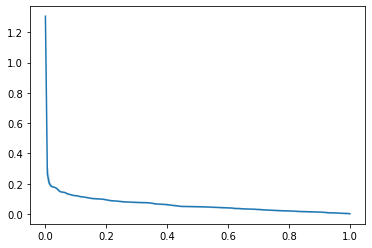

In [36]:
sns.lineplot(tpr,thresholds)

In [48]:
f1_dict={}

for a in np.arange(0.0,1.0,0.001):
    predicted_test= list(map( lambda x: 1 if x>a else 0, logreg.predict_proba(X_test_scaled)[:,1]))
    f1_dict.update({a:f1_score(y_test, predicted_test)})

In [57]:
pd.DataFrame(data=f1_dict.values,index=f1_dict.keys)

ValueError: DataFrame constructor not properly called!

In [22]:
logreg.coef_.reshape(-1)

array([ 5.38983847,  0.38304423,  0.61059362,  0.83173879, -0.6957426 ,
       -0.02319526,  0.06097229, -0.08062679, -0.17970558,  0.1133838 ,
        0.11117285, -0.23920916, -0.12401345, -0.21021193])

Text(0.5, 1.0, 'Coefficient plot')

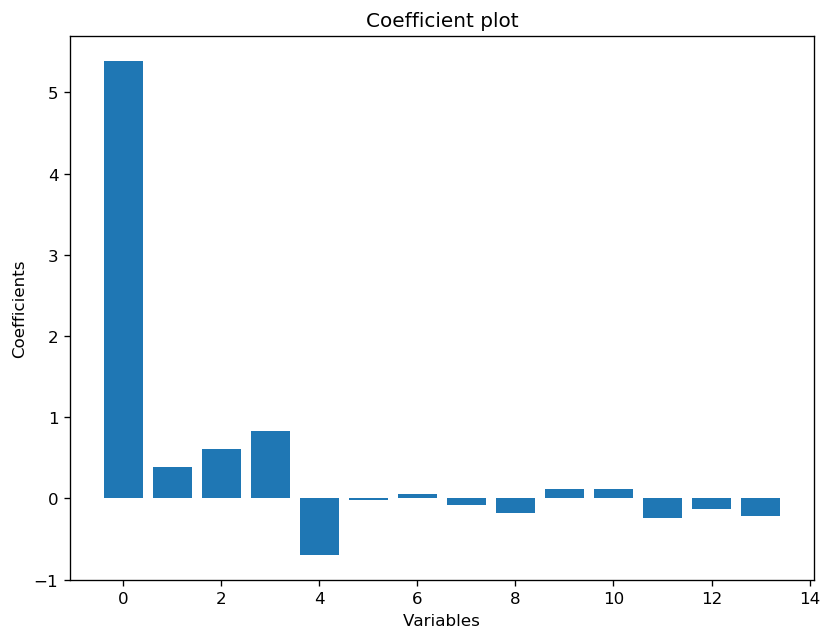

In [23]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X_train.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [24]:
X_train.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked'],
      dtype='object')

Age, Hypertension, Heart_Disease, Avg_Glucose_Level,bmi seem to be affecting our model more